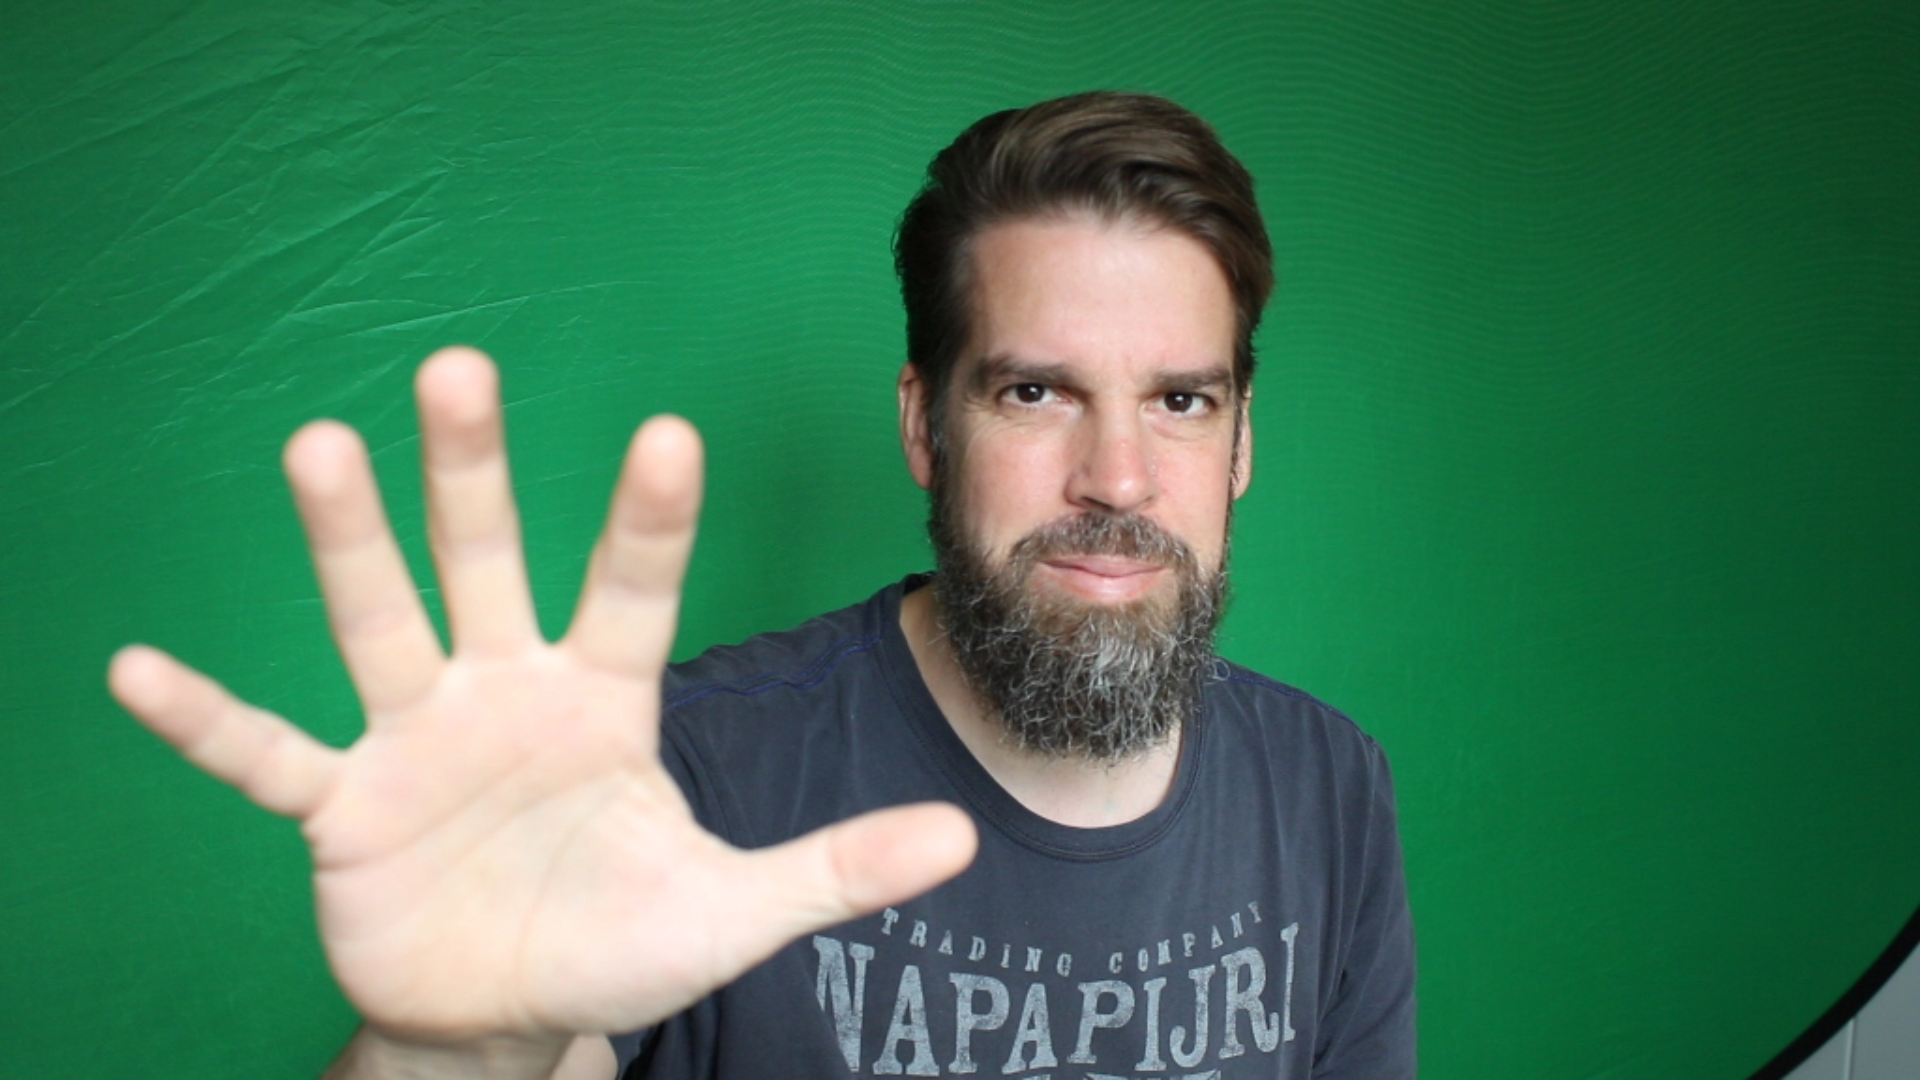

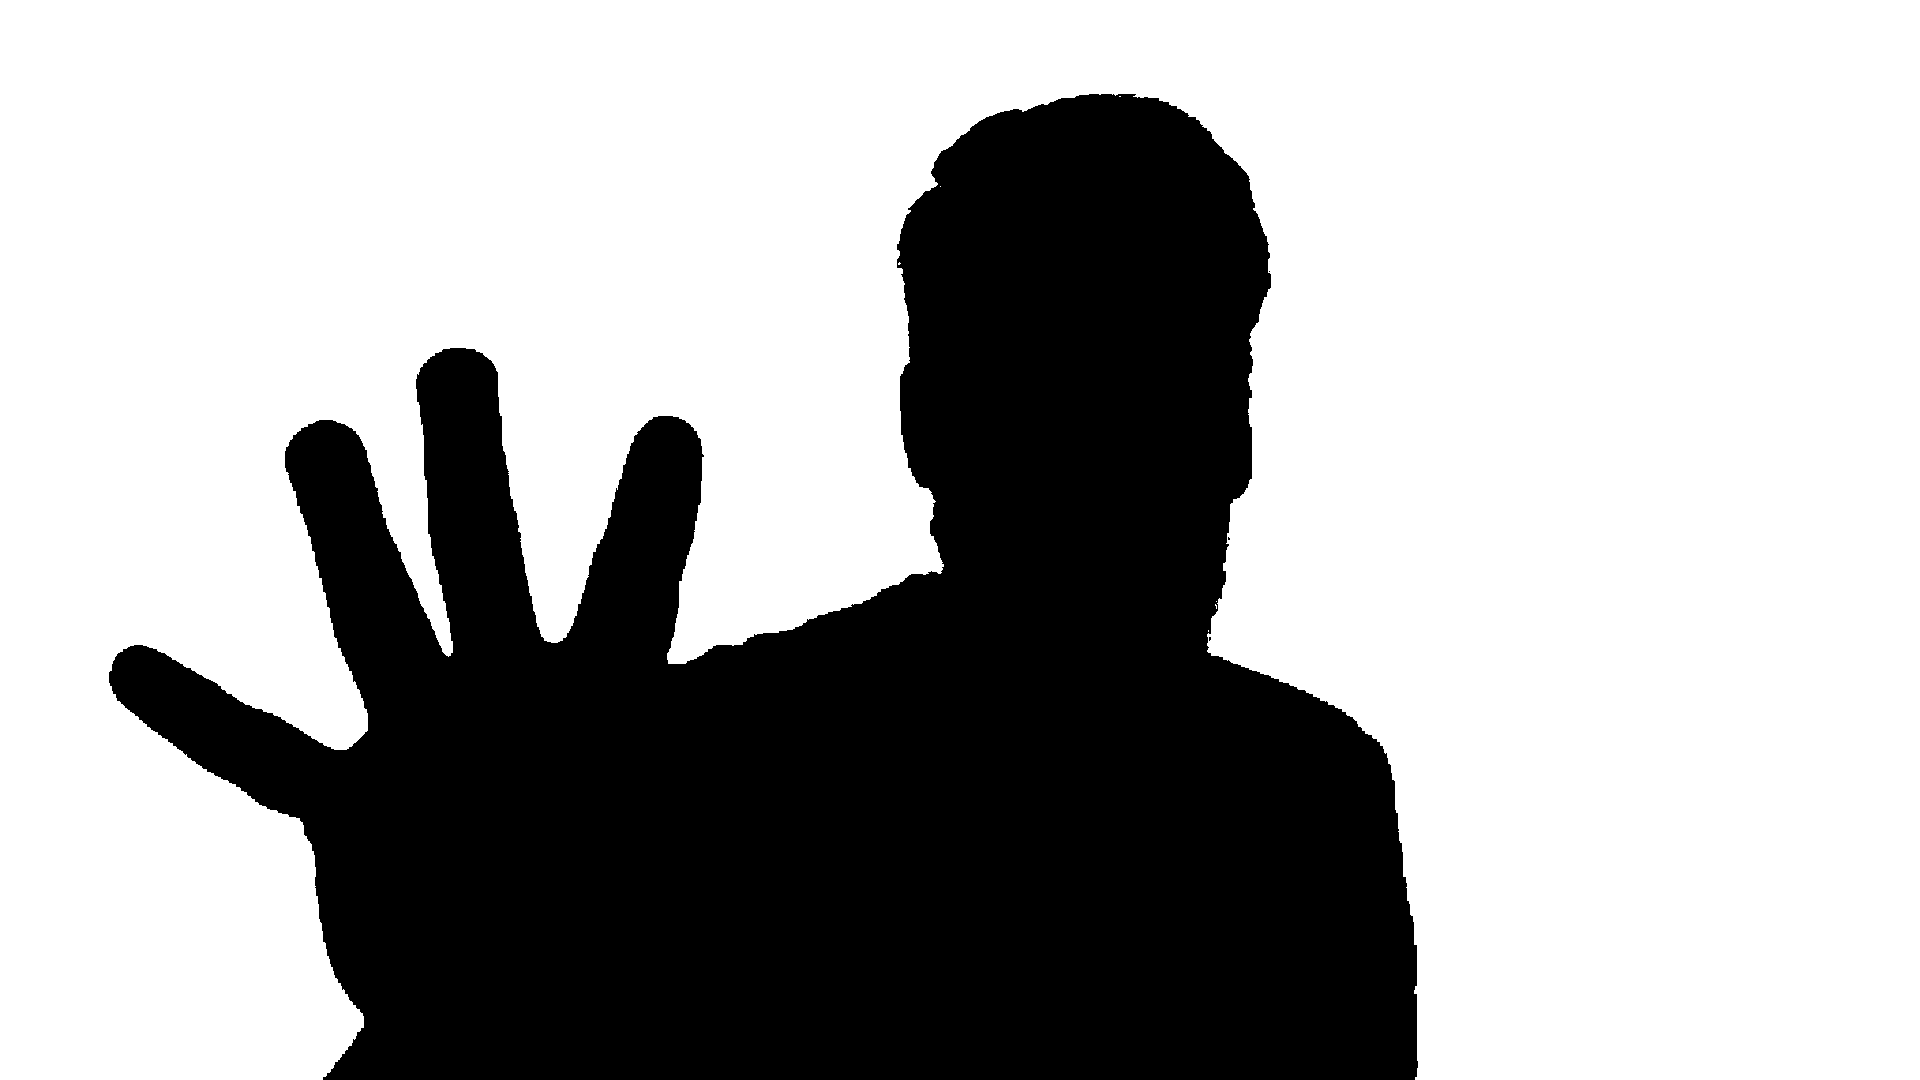

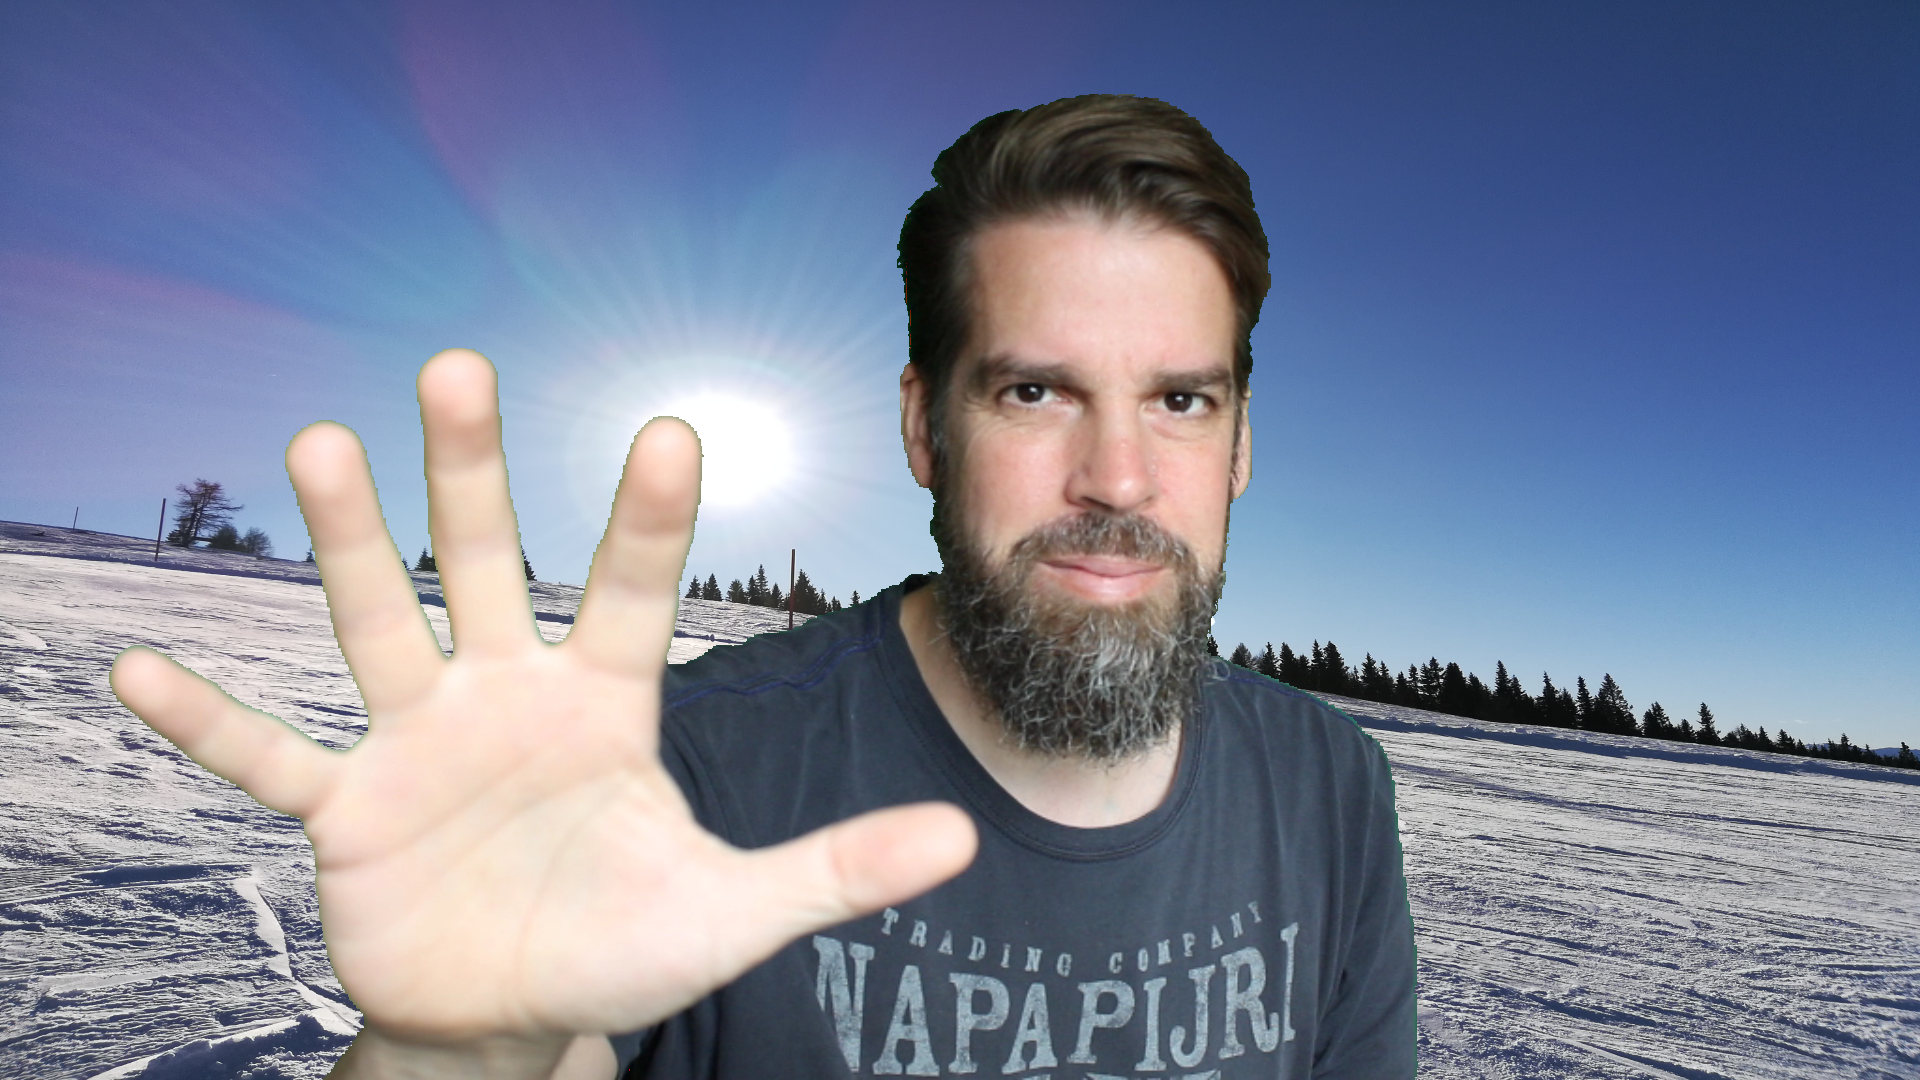

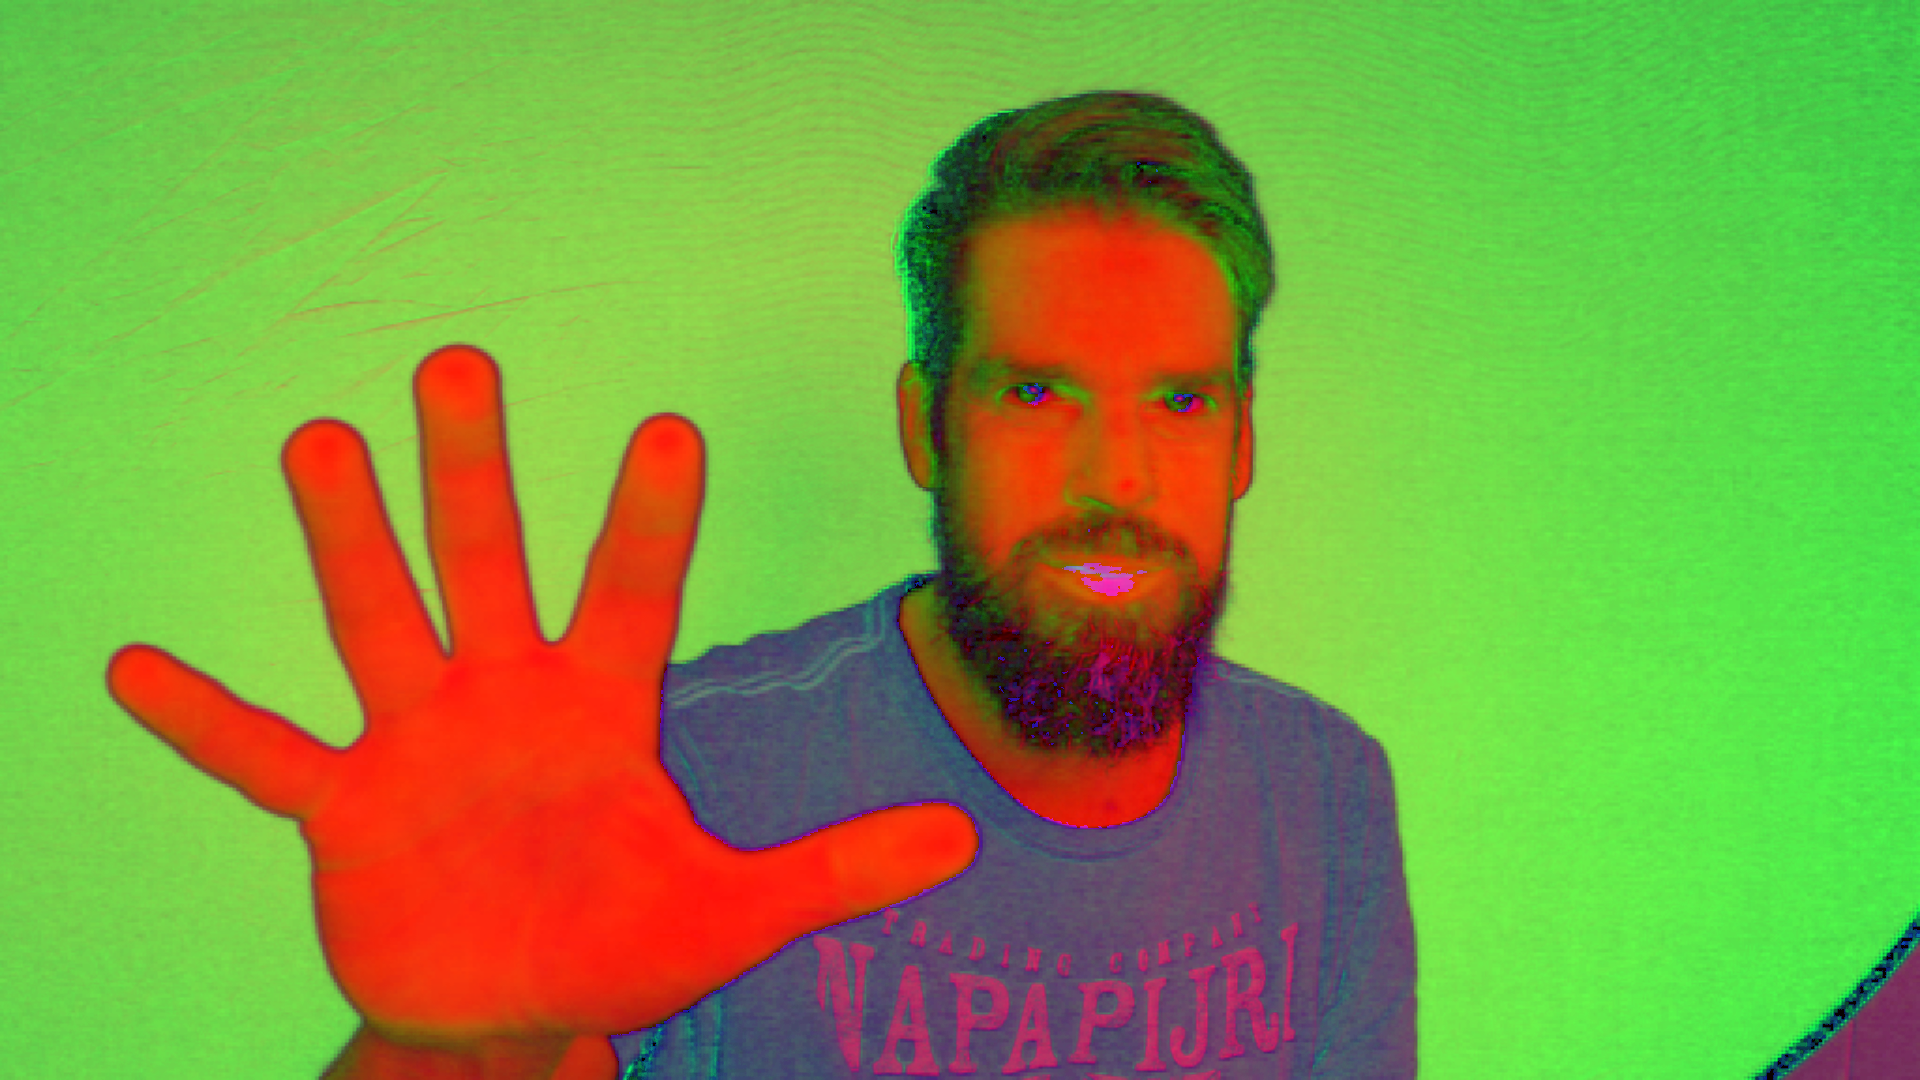

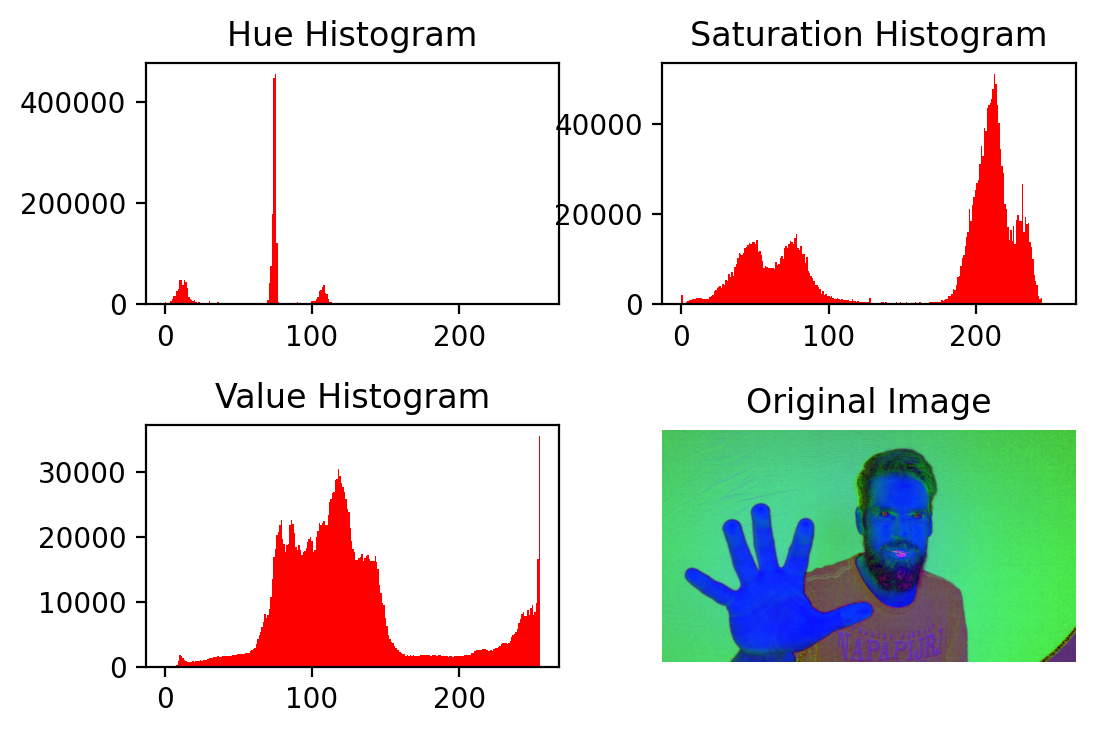

In [10]:
import cv2  
import numpy as np  
# to output something in jupyter
from IPython.display import Image, display
# to output histograms
import matplotlib.pyplot as plt

# load test image and background
frame = cv2.imread("Training-unsharp.png") 
background = cv2.imread("IMG_20200105_133115.jpg") 

# resize both to be the same size
frame = cv2.resize(frame, (1920, 1080)) 
background = cv2.resize(background, (1920, 1080), interpolation=cv2.INTER_AREA) 
  
# the hsv space helps us to create a better mask
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)


h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

plt.rcParams['figure.dpi'] = 200
plt.subplots_adjust(hspace=0.5, wspace=0.25)
plt.subplot(2, 2, 4)
plt.imshow(hsv)
plt.axis('off')
plt.title('Original Image')

plt.subplot(2, 2, 1)
plt.hist(h.ravel(), bins=256, range=(0, 255), color='r')
plt.title('Hue Histogram')

plt.subplot(2, 2, 2)
plt.hist(s.ravel(), bins=256, range=(0, 255), color='r')
plt.title('Saturation Histogram')

plt.subplot(2, 2, 3)
plt.hist(v.ravel(), bins=256, range=(0, 255), color='r')
plt.title('Value Histogram')


l_green = np.array([40, 50, 50]) 
u_green = np.array([80, 255, 255]) 

mask = cv2.inRange(hsv, l_green, u_green) 

# greenscreen is not perfect - it doesn't fill the corners
# so let's fix the mask by filling the one corner left open
h, w = frame.shape[:2]
fillmask = np.zeros((h + 2, w + 2), np.uint8)
frame = frame.astype("uint8")
cv2.floodFill(mask, fillmask, (1919, 1079), 255)
    
res = cv2.bitwise_and(frame, frame, mask = mask) 
  
f = frame - res 
f = np.where(f == 0, background, f) 

# now resize the resulting image to a fifth of the original image
#f = cv2.resize(f, (int(1920/5), int(1080/5)), interpolation=cv2.INTER_AREA) 

cv2.imwrite("result.png",frame)
display(Image(filename="result.png"))

cv2.imwrite("result.png",mask)
display(Image(filename="result.png"))

cv2.imwrite("result.png",f)
display(Image(filename="result.png"))

cv2.imwrite("result.png",hsv)
display(Image(filename="result.png"))

